In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)


In [15]:
# Create a DataFrame
df = housing.frame

# Display the first few rows of the DataFrame
display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Brief description of the data set and a summary of its attributes


In [7]:
description = """
The California Housing dataset contains information collected in the 1990 census concerning housing in California. 
It is widely used for regression analysis and contains 20640 observations on 9 variables. 
The aim is to predict the median house value (MedHouseVal) based on various features.

Attributes:
- MedInc: median income in block group
- HouseAge: median house age in block group
- AveRooms: average number of rooms per household
- AveBedrms: average number of bedrooms per household
- Population: block group population
- AveOccup: average number of household members
- Latitude: block group latitude
- Longitude: block group longitude
- MedHouseVal: median house value for California districts, expressed in hundreds of thousands of dollars
"""

print(description)


The California Housing dataset contains information collected in the 1990 census concerning housing in California. 
It is widely used for regression analysis and contains 20640 observations on 9 variables. 
The aim is to predict the median house value (MedHouseVal) based on various features.

Attributes:
- MedInc: median income in block group
- HouseAge: median house age in block group
- AveRooms: average number of rooms per household
- AveBedrms: average number of bedrooms per household
- Population: block group population
- AveOccup: average number of household members
- Latitude: block group latitude
- Longitude: block group longitude
- MedHouseVal: median house value for California districts, expressed in hundreds of thousands of dollars



In [8]:
print("\nSummary of the dataset attributes:")
display(df.describe())


Summary of the dataset attributes:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Initial plan for data exploration

In [9]:
#check the datatypes 
print(df.dtypes)

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [10]:
display(df.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64



Histograms for each numerical feature:


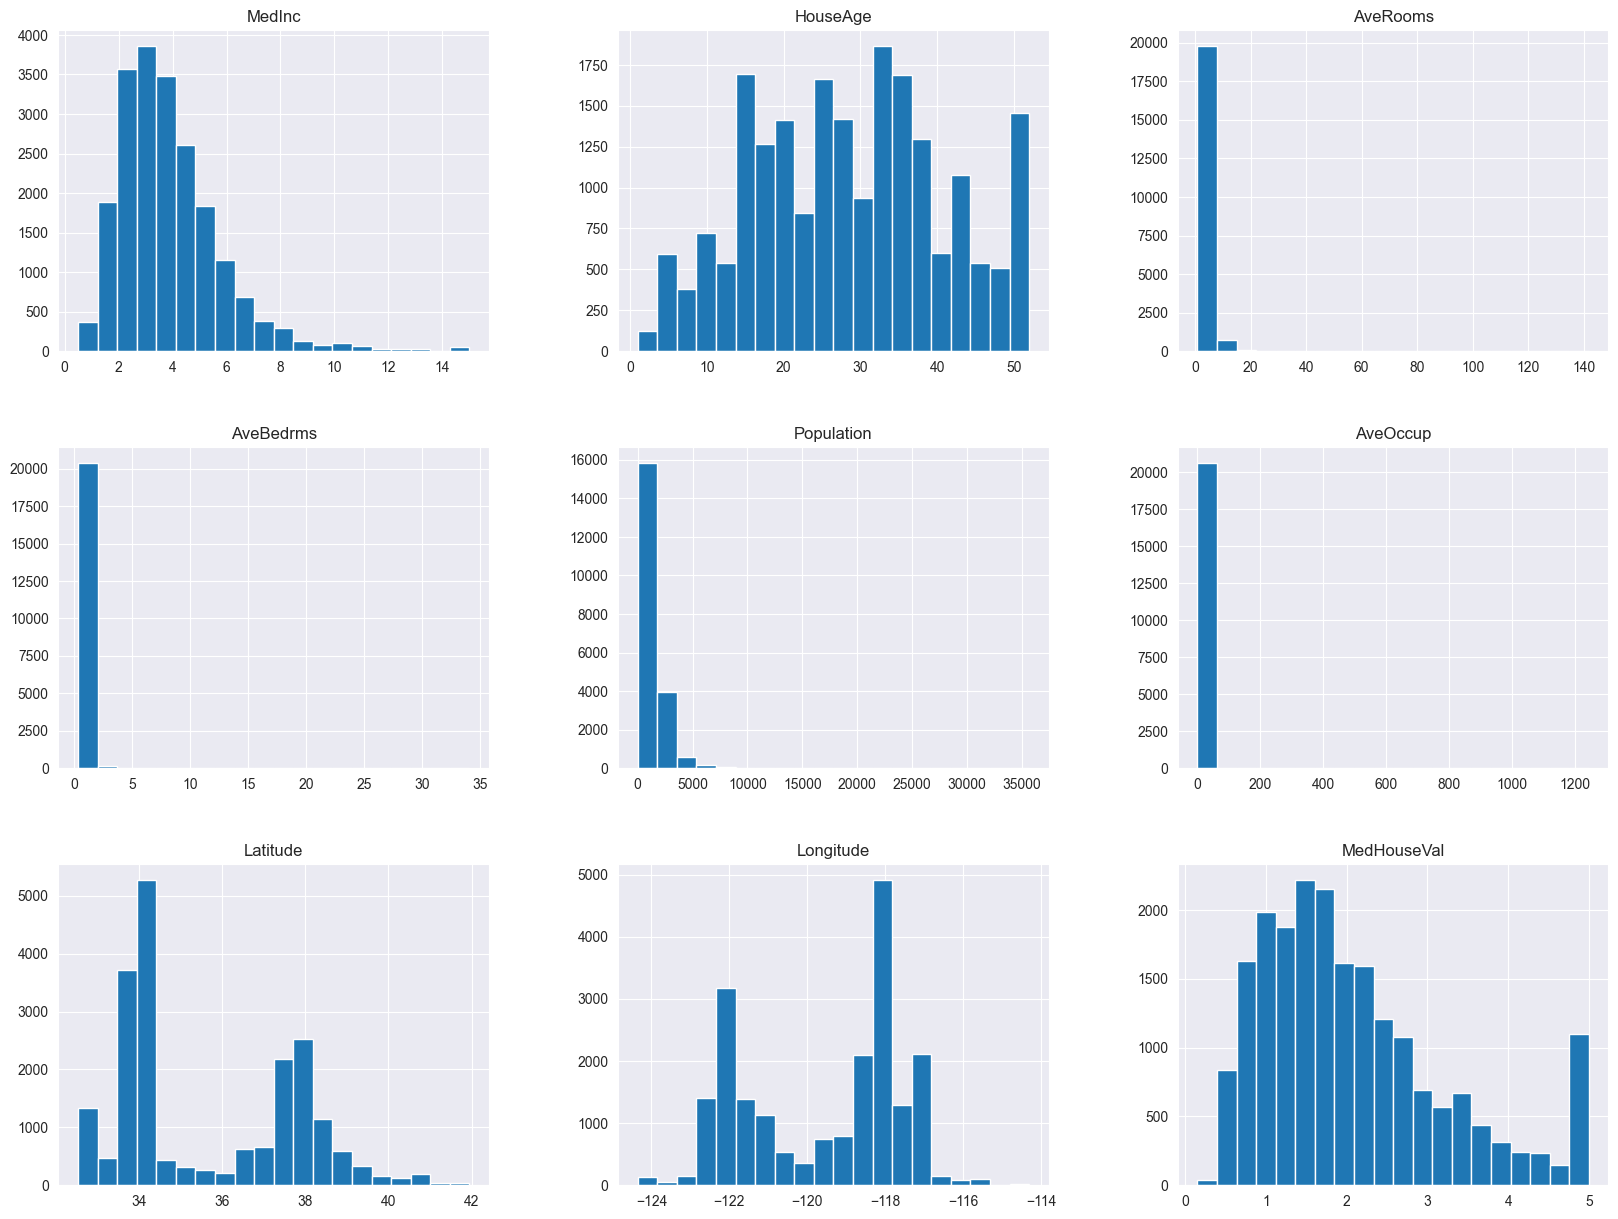

In [16]:
print("\nHistograms for each numerical feature:")
df.hist(bins=20, figsize=(20, 15))
plt.show()


Correlation matrix:


<Axes: >

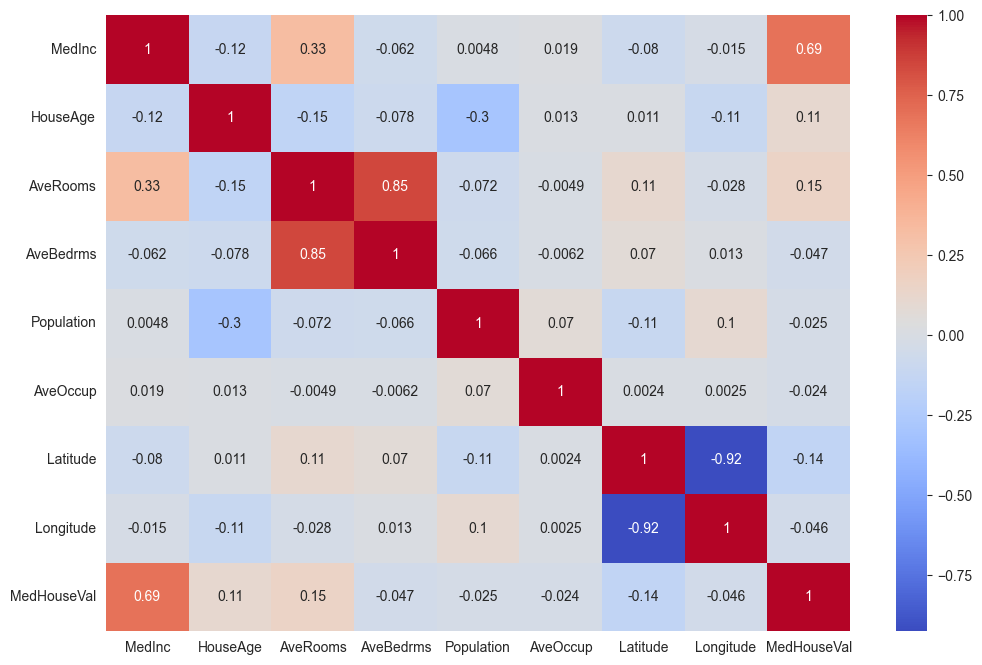

In [17]:
    # Correlation Analysis
#The correlation matrix is computed and visualized using a heatmap to identify relationships between features.
    print("\nCorrelation matrix:")
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



Scatter plots for feature relationships:


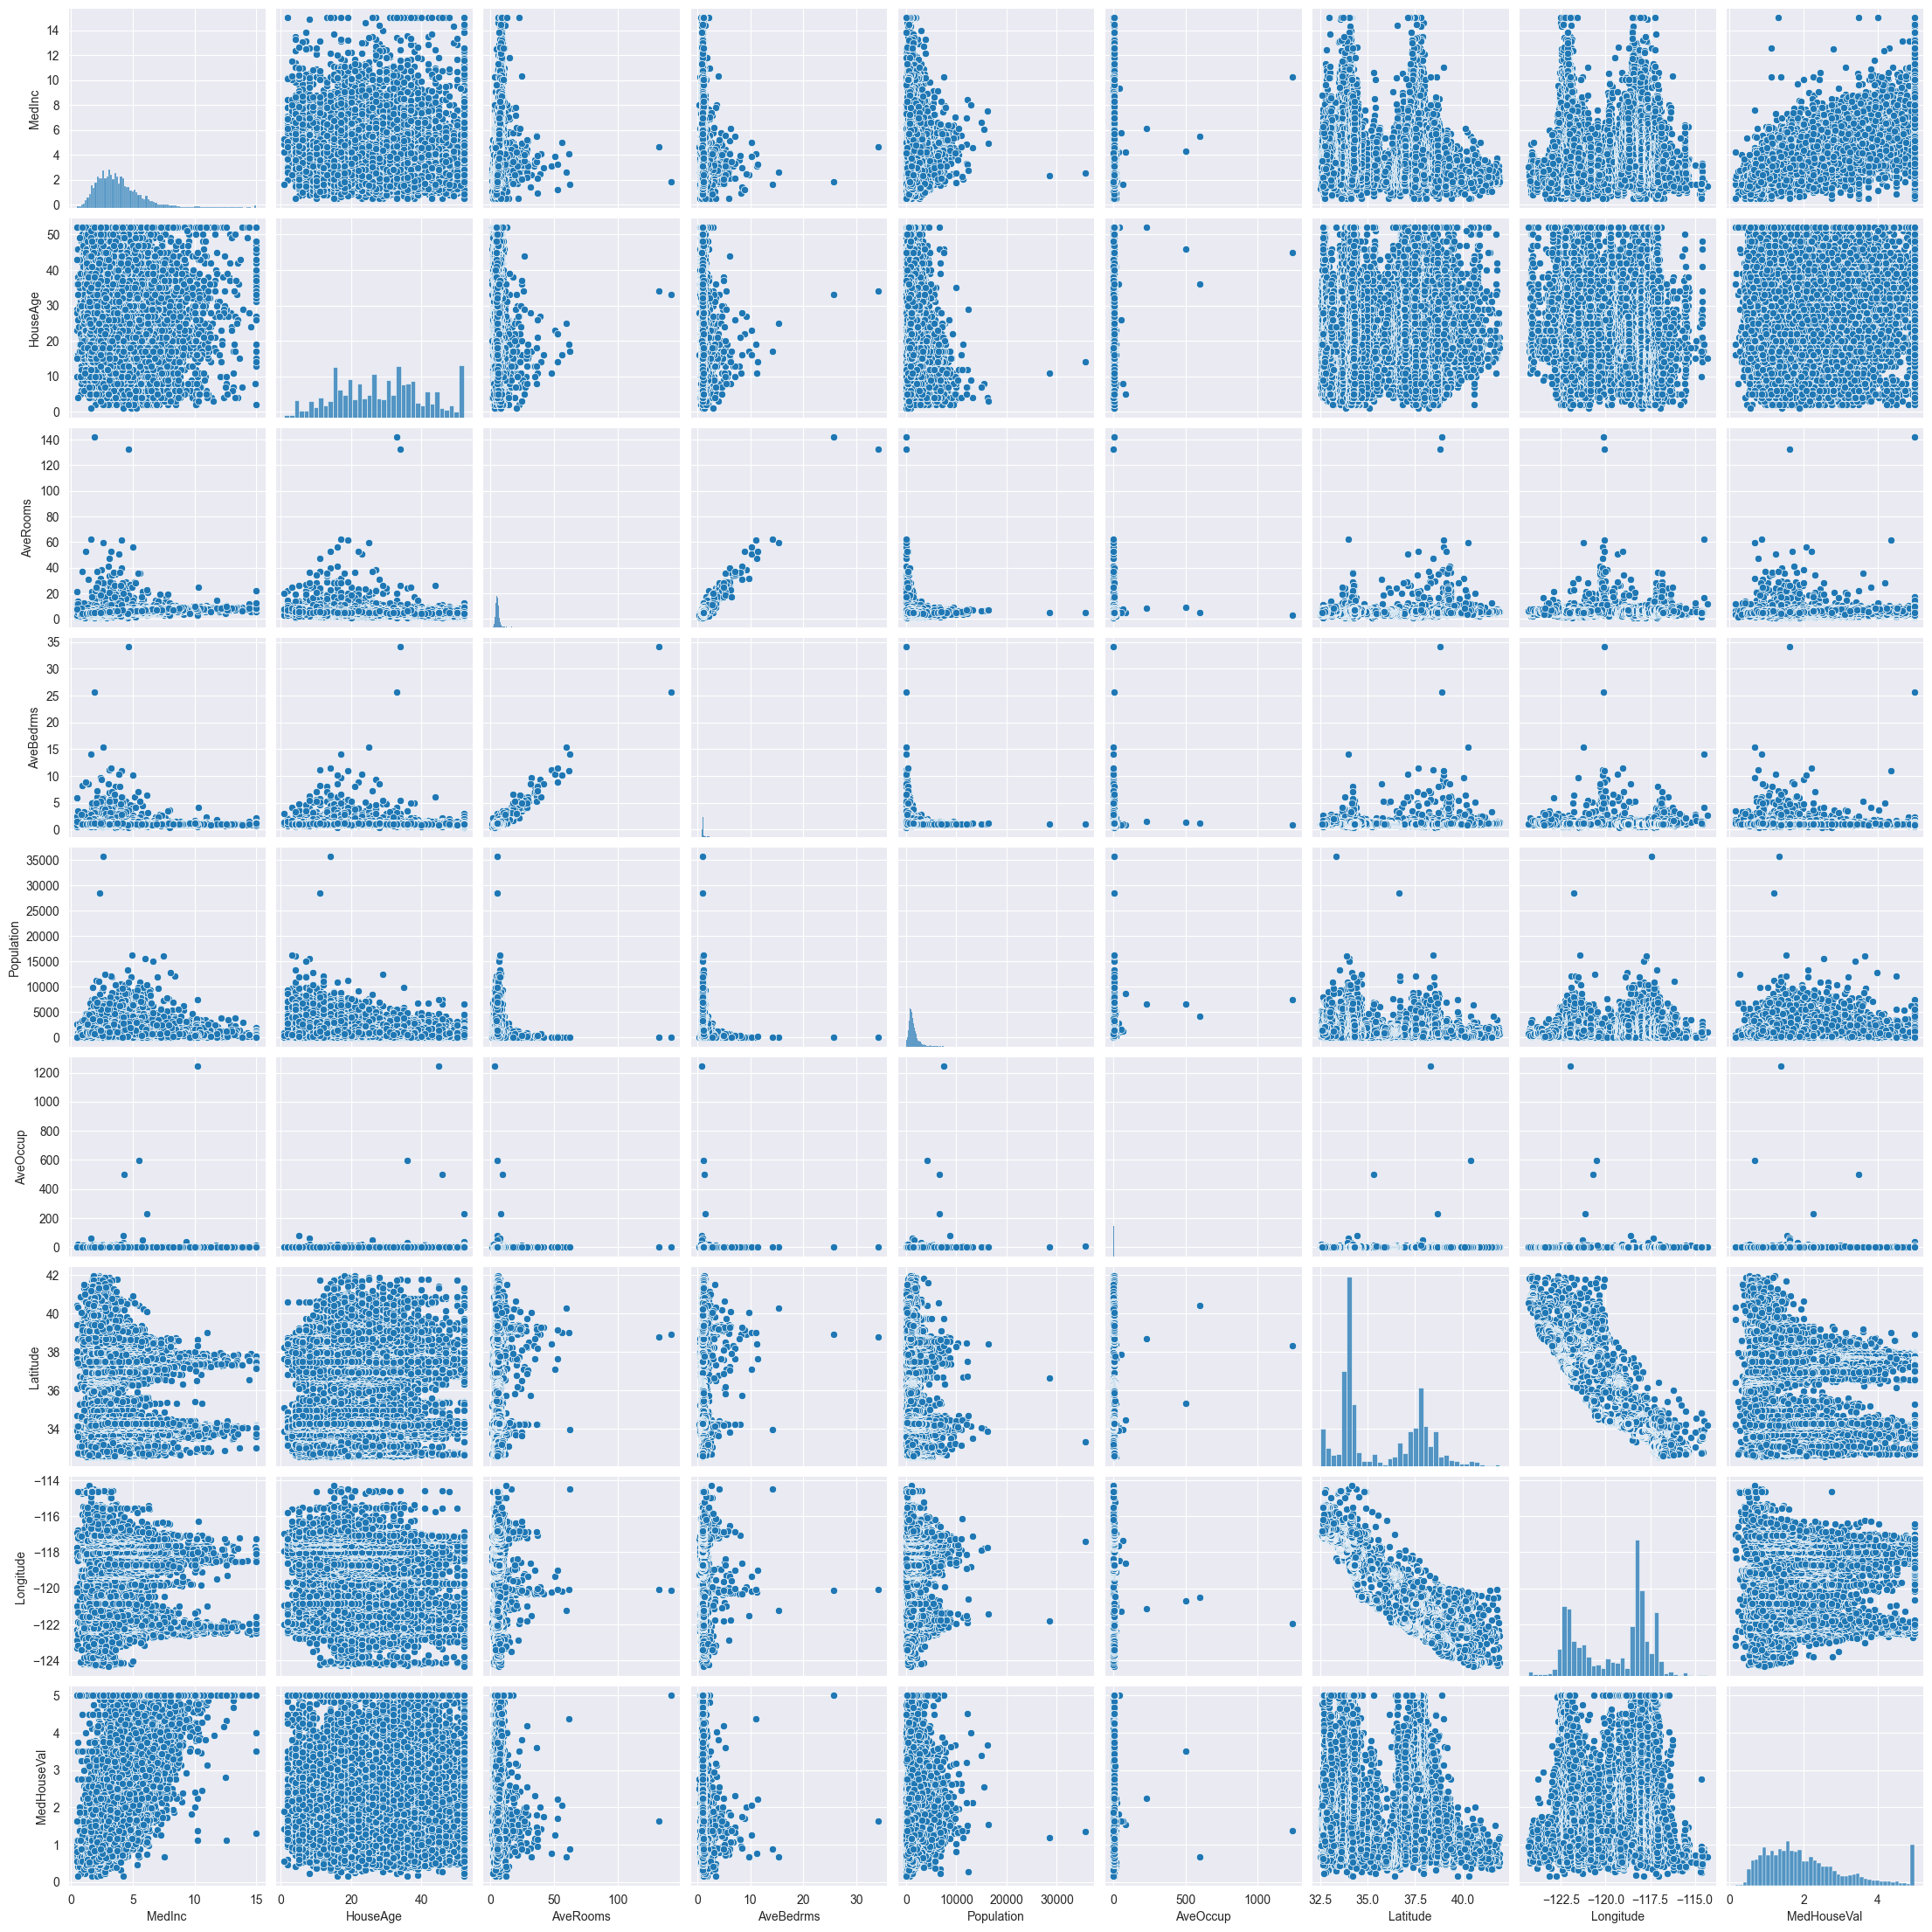

In [18]:
# Feature Relationships
# Scatter plots are created for pairs of features to explore their relationships.
print("\nScatter plots for feature relationships:")
sns.pairplot(df, vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'])
plt.show()

# Actions taken for data cleaning and feature engineering

In [20]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

Number of duplicate rows: 0


In [22]:
# Created interaction terms to capture the combined effect of multiple features. For example, creating a new feature RoomsPerHousehold by dividing AveRooms by AveOccup.
df['RoomsPerHousehold'] = df['AveRooms'] / df['AveOccup']
df['BedroomsPerRoom'] = df['AveBedrms'] / df['AveRooms']
df['PopulationPerHousehold'] = df['Population'] / df['AveOccup']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerHousehold,BedroomsPerRoom,PopulationPerHousehold
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591,126.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797,1138.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516,177.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458,219.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646,0.172096,259.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1.970414,0.224625,330.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1.957865,0.215208,114.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,2.238332,0.215173,433.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,2.510121,0.219892,349.0


In [23]:
# Applied log transformation to skewed features to normalize their distribution.
df['MedInc_log'] = np.log(df['MedInc'])
df['Population_log'] = np.log(df['Population'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerHousehold,BedroomsPerRoom,PopulationPerHousehold,MedInc_log,Population_log
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591,126.0,2.119287,5.774552
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797,1138.0,2.116424,7.783641
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516,177.0,1.982022,6.206576
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458,219.0,1.730434,6.324359
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646,0.172096,259.0,1.347086,6.336826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1.970414,0.224625,330.0,0.444878,6.739337
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1.957865,0.215208,114.0,0.938756,5.874931
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,2.238332,0.215173,433.0,0.530628,6.914731
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,2.510121,0.219892,349.0,0.624440,6.608001


In [24]:
from sklearn.preprocessing import StandardScaler

# Select features for scaling
features_to_scale = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [26]:
display(df.head())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerHousehold,BedroomsPerRoom,PopulationPerHousehold,MedInc_log,Population_log
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526,2.732919,0.146591,126.0,2.119287,5.774552
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585,2.956685,0.155797,1138.0,2.116424,7.783641
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521,2.957661,0.129516,177.0,1.982022,6.206576
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413,2.283154,0.184458,219.0,1.730434,6.324359
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422,2.879646,0.172096,259.0,1.347086,6.336826


# Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

In [27]:
##These key findings and insights provide a solid foundation for further analysis and predictive modeling. By understanding the distributions, correlations, and relationships within the dataset, we can make informed decisions # about which features to include, transform, or engineer. Additionally, the actionable insights suggest specific steps to take in building more accurate and robust models.
##

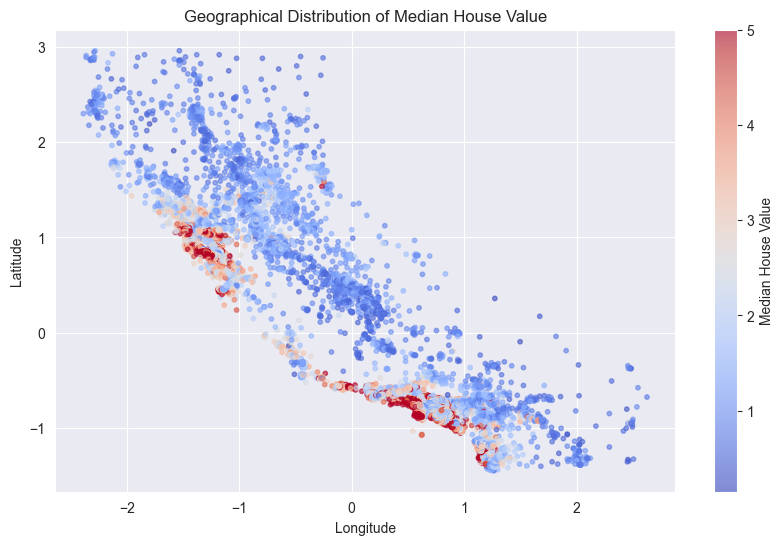

In [29]:

# Geospatial Distribution of Median House Value
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], cmap='coolwarm', s=10, alpha=0.6)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Median House Value')
plt.show()



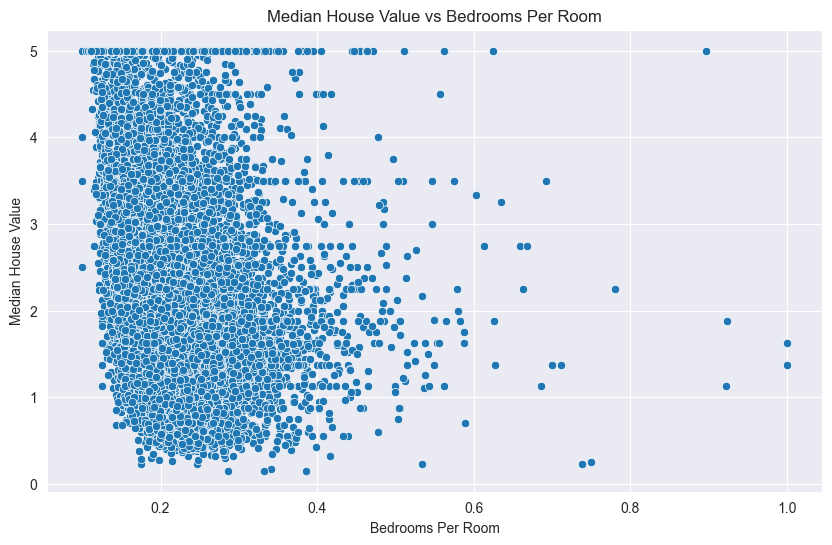

In [30]:
# Plot new feature relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BedroomsPerRoom', y='MedHouseVal', data=df)
plt.title('Median House Value vs Bedrooms Per Room')
plt.xlabel('Bedrooms Per Room')
plt.ylabel('Median House Value')
plt.show()



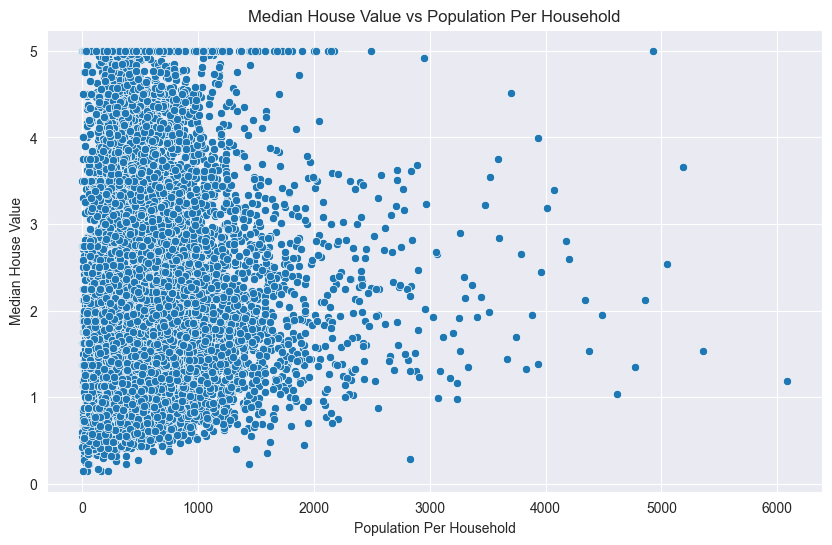

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PopulationPerHousehold', y='MedHouseVal', data=df)
plt.title('Median House Value vs Population Per Household')
plt.xlabel('Population Per Household')
plt.ylabel('Median House Value')
plt.show()

# Formulating at least 3 hypothesis about this data

In [32]:
# Hypothesis 1: Higher median income in a block group is associated with higher median house values.
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient
corr, p_value = pearsonr(df['MedInc'], df['MedHouseVal'])

# Output the results
print(f"Pearson's correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# Set significance level
alpha = 0.05

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant positive relationship between median income and median house values.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant relationship between median income and median house values.")

Pearson's correlation coefficient: 0.688075207958547
P-value: 0.0
Reject the null hypothesis (H0). There is a significant positive relationship between median income and median house values.


In [33]:
# Calculate Pearson's correlation coefficient
corr, p_value = pearsonr(df['MedInc'], df['MedHouseVal'])

# Output the results
print(f"Pearson's correlation coefficient: {corr:.2f}")
print(f"P-value: {p_value:.2e}")

# Set significance level
alpha = 0.05

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant positive relationship between median income and median house values.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant relationship between median income and median house values.")

Pearson's correlation coefficient: 0.69
P-value: 0.00e+00
Reject the null hypothesis (H0). There is a significant positive relationship between median income and median house values.


# Conducting a formal significance test for one of the hypotheses and discuss the results 

In [34]:
# Import necessary libraries for statistical testing
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient
corr, p_value = pearsonr(df['MedInc'], df['MedHouseVal'])

# Output the results
print(f"Pearson's correlation coefficient: {corr:.2f}")
print(f"P-value: {p_value:.2e}")

# Set significance level
alpha = 0.05

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant positive relationship between median income and median house values.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant relationship between median income and median house values.")


Pearson's correlation coefficient: 0.69
P-value: 0.00e+00
Reject the null hypothesis (H0). There is a significant positive relationship between median income and median house values.


# Suggestions for next steps in analyzing this data

In [35]:
#After conducting the initial exploratory data analysis (EDA) and hypothesis testing, here are several next steps that can be taken to deepen the analysis and derive more actionable insights:

#Polynomial Features: Create polynomial features to capture non-linear relationships between variables.

# Regression Models: Build and compare various regression models such as Linear Regression, Ridge Regression, Lasso Regression, and Polynomial Regression.

# Tree-based Models: Explore decision tree-based models such as Random Forest, Gradient Boosting, and XGBoost to capture complex interactions between features.

#Cross-Validation: Use cross-validation techniques to ensure the model's robustness and generalizability.

# A paragraph that summarizes the quality of this data set and a request for additional data if needed

In [ ]:
# The California Housing dataset is a high-quality dataset that provides a comprehensive snapshot of housing values and associated demographic features across California. The data includes 20,640 observations with 9 variables, offering robust coverage for analysis. It is clean with no missing values, and the features are well-documented and relevant for predicting median house values. However, there are certain limitations, such as potential multicollinearity among features and the lack of temporal data which might affect the robustness of the predictive models. 